In [41]:
import pandas as pd
import statsmodels as sm
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from datetime import datetime,date
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.seasonal
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.varmax import VARMAX

In [42]:
donnee =pd.read_table("train.csv",sep = ',',header = 0)

In [43]:
donnee=donnee[['temperature','electricity_consumption']]

In [44]:
dataa=donnee[:552]
timesseries=pd.DataFrame(data= dataa.values, columns= ['temperature','electricity_consumption'] , index=pd.DatetimeIndex(start='2013-07-01 00:00:00' , periods=552 , freq='h'))
training=timesseries[:505]
test=timesseries['electricity_consumption'][505:]

In [45]:
model = VARMAX(training, order=(1, 20))
results = model.fit(disp=False)

/usr/lib64/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/lib64/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/usr/lib64/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
fcast=results.predict(start='2013-07-22 00:00:00',end='2013-07-23 23:00:00')

/usr/lib64/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/lib64/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [47]:
fcast.head()

,temperature,electricity_consumption
2013-07-22 00:00:00,-10.183339,405.280399
2013-07-22 01:00:00,-10.425414,383.777552
2013-07-22 02:00:00,-10.480616,380.180472
2013-07-22 03:00:00,-10.501375,374.395272
2013-07-22 04:00:00,-10.569510,359.371377


In [48]:
values=fcast.values[:,1]

In [49]:
predict=pd.Series(values,index=pd.date_range('2013-07-22 00:00:00',periods=48,freq='h'))

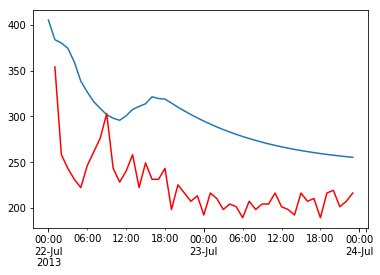

In [50]:
predict.plot()
test.plot(color='r')
plt.show()